# Лабораторная работа 6
### Воложанин В.О. ИВТ 1.3 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
!wget -q https://www.dropbox.com/s/bbm6rxqb4bsfl2d/training_data.xlsx
!wget -q https://www.dropbox.com/s/gjhur7eyzcv265y/test_data.xlsx

In [3]:
def load_and_clean_data(file_path):
    data = pd.read_excel(file_path)
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    data.dropna(inplace=True)
    return data._get_numeric_data()

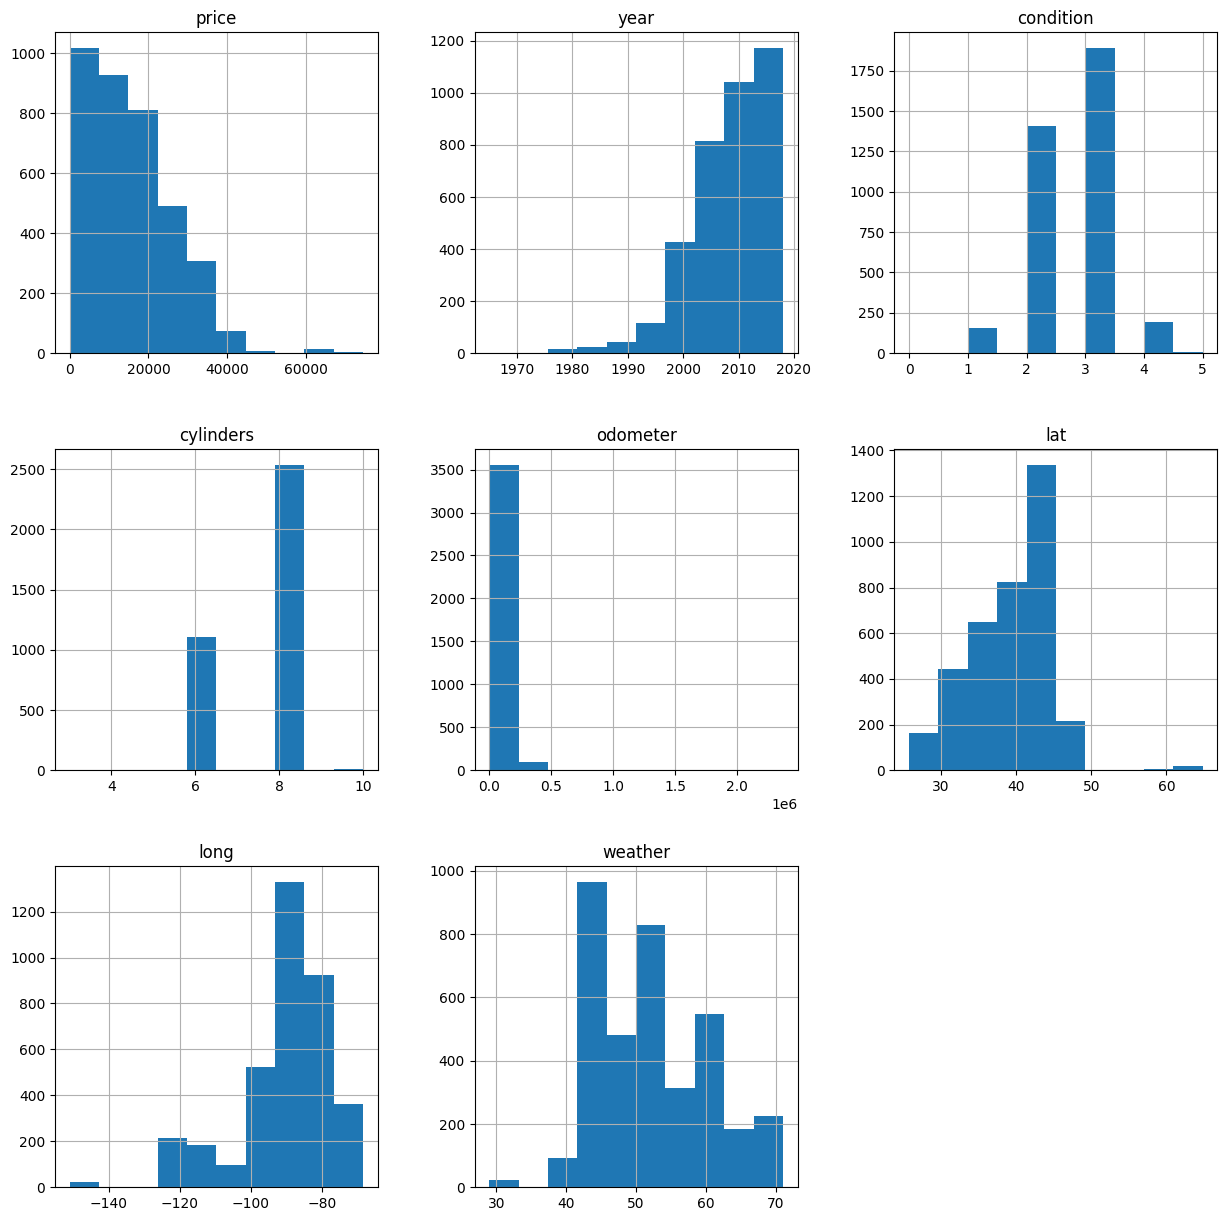

In [4]:
training_data = load_and_clean_data('training_data.xlsx')
test_data = load_and_clean_data('test_data.xlsx')

training_data.hist(figsize=(15, 15))
plt.show()

In [5]:
target_variable_name = 'price'
X_train, y_train = training_data.drop(target_variable_name, axis=1), training_data[target_variable_name]
X_test, y_test = test_data.drop(target_variable_name, axis=1), test_data[target_variable_name]

In [6]:
linear_regression_model = linear_model.LinearRegression()
random_forest_model = ensemble.RandomForestRegressor(random_state=42)

linear_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

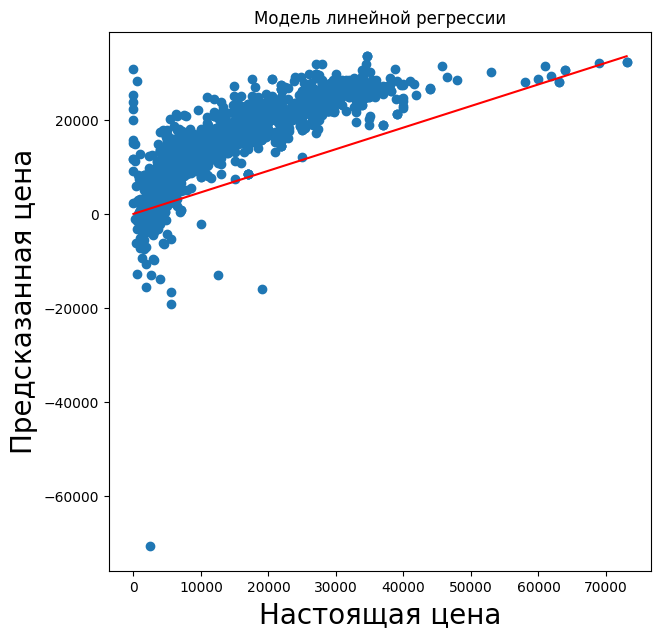

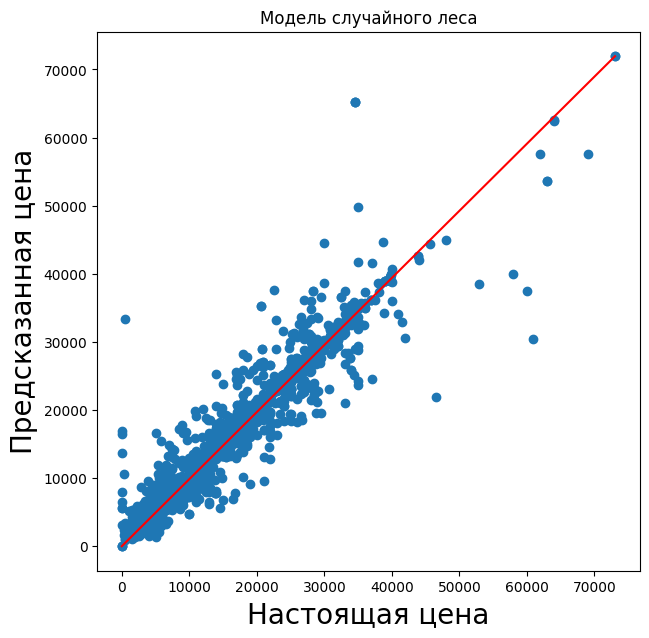

In [7]:
y_test_lr_pred = linear_regression_model.predict(X_test)
y_test_rf_pred = random_forest_model.predict(X_test)

def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(7, 7))
    plt.scatter(y_true, y_pred)
    plt.plot([0, max(y_true)], [0, max(y_pred)], color='red')
    plt.xlabel('Настоящая цена', fontsize=20)
    plt.ylabel('Предсказанная цена', fontsize=20)
    plt.title(f'Модель {model_name}')
    plt.show()

plot_predictions(y_test, y_test_lr_pred, 'линейной регрессии')
plot_predictions(y_test, y_test_rf_pred, 'случайного леса')

In [8]:
def print_metrics(y, y_pred, dataset_type='Test'):
    print(f'{dataset_type} MAE: {mean_absolute_error(y, y_pred):.7f}')
    print(f'{dataset_type} RMSE: {mean_squared_error(y, y_pred, squared=False):.7f}')
    print(f'{dataset_type} R^2: {r2_score(y, y_pred):.7f}')

print('Linear regression model:')
print_metrics(y_test, y_test_lr_pred)

print('Random forest model:')
print_metrics(y_test, y_test_rf_pred)

training_data = pd.read_excel('training_data.xlsx').drop('Unnamed: 0', axis=1).dropna()
test_data = pd.read_excel('test_data.xlsx').drop('Unnamed: 0', axis=1).dropna()

Linear regression model:
Test MAE: 4485.5561322
Test RMSE: 6656.3389129
Test R^2: 0.6222727
Random forest model:
Test MAE: 1829.2854340
Test RMSE: 3541.1230257
Test R^2: 0.8930971


In [9]:
categorical_cols = ['title_status', 'transmission', 'drive', 'size']
le = LabelEncoder()

for col in categorical_cols:
    training_data[col] = le.fit_transform(training_data[col]) + 1
    test_data[col] = le.transform(test_data[col]) + 1

X_train_le, y_train_le = training_data.drop(target_variable_name, axis=1), training_data[target_variable_name]
X_test_le, y_test_le = test_data.drop(target_variable_name, axis=1), test_data[target_variable_name]

random_forest_model.fit(X_train_le, y_train_le)
y_test_rf_pred_le = random_forest_model.predict(X_test_le)

print('With categorical cols, LabelEncoder:')
print_metrics(y_test_le, y_test_rf_pred_le)

With categorical cols, LabelEncoder:
Test MAE: 1662.7155016
Test RMSE: 3323.8305226
Test R^2: 0.9058142


In [10]:
categor_cols = ['condition', 'cylinders', 'title_status', 'transmission', 'drive', 'size']
others_cols = ['price', 'year', 'odometer', 'lat', 'long', 'weather']

one_hot_encoder = OneHotEncoder(sparse_output=False)

categor_columns_training = training_data[categor_cols]
others_columns_training = training_data[others_cols]
categor_columns_test = test_data[categor_cols]
others_columns_test = test_data[others_cols]

result_encoding_training = one_hot_encoder.fit_transform(categor_columns_training)
result_encoding_test = one_hot_encoder.transform(categor_columns_test)

result_encoding_training = pd.DataFrame(result_encoding_training, index=training_data.index)
result_encoding_test = pd.DataFrame(result_encoding_test, index=test_data.index)

training_data = pd.concat([others_columns_training, result_encoding_training], axis=1)
test_data = pd.concat([others_columns_test, result_encoding_test], axis=1)

In [11]:
training_data.columns = training_data.columns.astype(str)
test_data.columns = test_data.columns.astype(str)

X_train_ohe, y_train_ohe = training_data.drop(target_variable_name, axis=1), training_data[target_variable_name]
X_test_ohe, y_test_ohe = test_data.drop(target_variable_name, axis=1), test_data[target_variable_name]

random_forest_model.fit(X_train_ohe, y_train_ohe)
y_test_rf_pred_ohe = random_forest_model.predict(X_test_ohe)

In [12]:
print('With categorical cols, OneHotEncoder:')
print_metrics(y_test_ohe, y_test_rf_pred_ohe)
print('With categorical cols, LabelEncoder:')
print_metrics(y_test_le, y_test_rf_pred_le)
print('Without categorical cols:')
print_metrics(y_test, y_test_rf_pred)

With categorical cols, OneHotEncoder:
Test MAE: 1672.7868223
Test RMSE: 3356.2056910
Test R^2: 0.9039705
With categorical cols, LabelEncoder:
Test MAE: 1662.7155016
Test RMSE: 3323.8305226
Test R^2: 0.9058142
Without categorical cols:
Test MAE: 1829.2854340
Test RMSE: 3541.1230257
Test R^2: 0.8930971


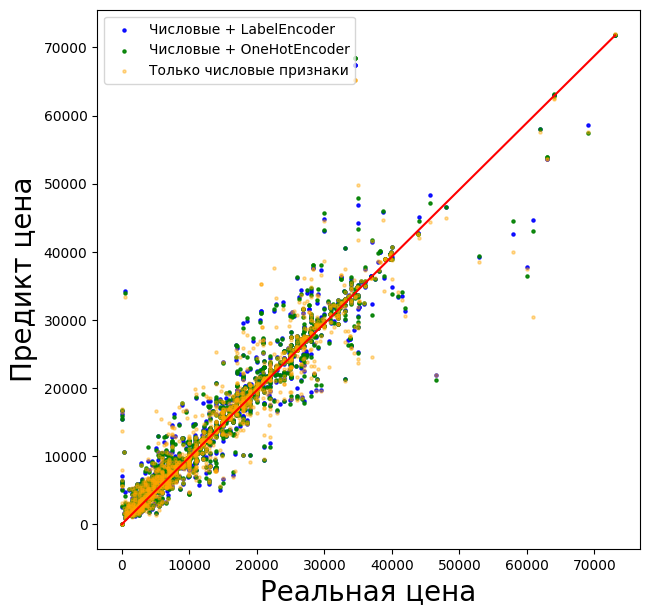

In [13]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test_le, y_test_rf_pred_le, color='blue', alpha=0.9, label='Числовые + LabelEncoder', s=5)
plt.scatter(y_test_ohe, y_test_rf_pred_ohe, color='green', alpha=0.9, label='Числовые + OneHotEncoder', s=5)
plt.scatter(y_test, y_test_rf_pred, color='orange', alpha=0.4, label='Только числовые признаки', s=5)
plt.plot([0, max(y_test_le)], [0, max(y_test_rf_pred_le)], color='red')
plt.legend()
plt.xlabel('Реальная цена', fontsize=20)
plt.ylabel('Предикт цена', fontsize=20)
plt.show()